# Pandas plotting

See pandas.Dataframe.plot in [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [1]:
# import libraries

import pandas as pd
import numpy as np

In [2]:
# create a dataframe with random number

df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.213748,0.438780,0.214546,-0.886885
10,-0.090358,0.070286,-0.550745,0.946911
20,-0.606748,1.648941,0.184427,1.003396
30,-0.599531,1.396985,0.819852,0.504277
40,0.446930,0.727782,0.842815,0.857511
50,1.621559,0.390792,0.196781,0.401617
60,0.785151,1.418891,-0.807203,-0.064441
70,1.235671,1.858674,0.207114,0.490961
80,0.443619,2.356084,-0.689448,-0.226303
90,-0.207457,2.149270,-0.634789,-0.589975


<Axes: >

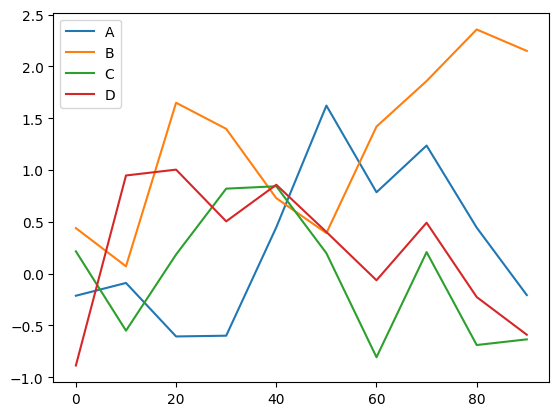

In [3]:
# Plot a line plot (default plot in Pandas plot)

df.plot()

<Axes: >

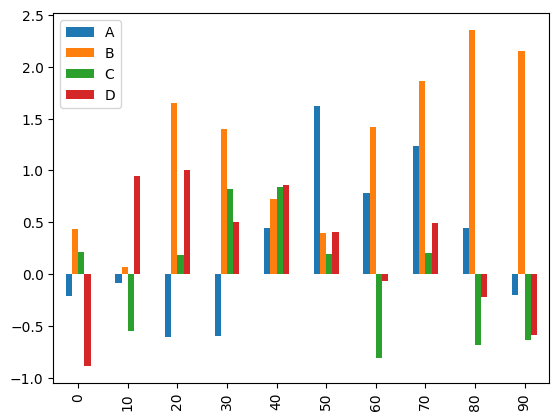

In [4]:
# Plot a vertical bar plot

df.plot.bar()

<Axes: xlabel='A', ylabel='B'>

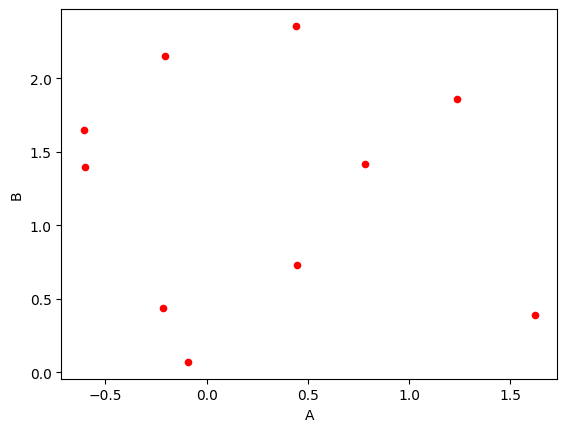

In [5]:
# Plot a scatterplot of column A against column B

df[['A','B']].plot.scatter(x='A', y='B', c='Red')

<Axes: ylabel='Frequency'>

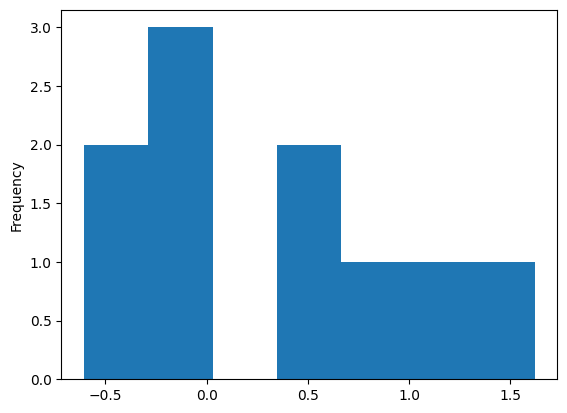

In [6]:
# Plot a histogram plot of column A only, divided over 7 bins

df['A'].plot.hist(bins=7)

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

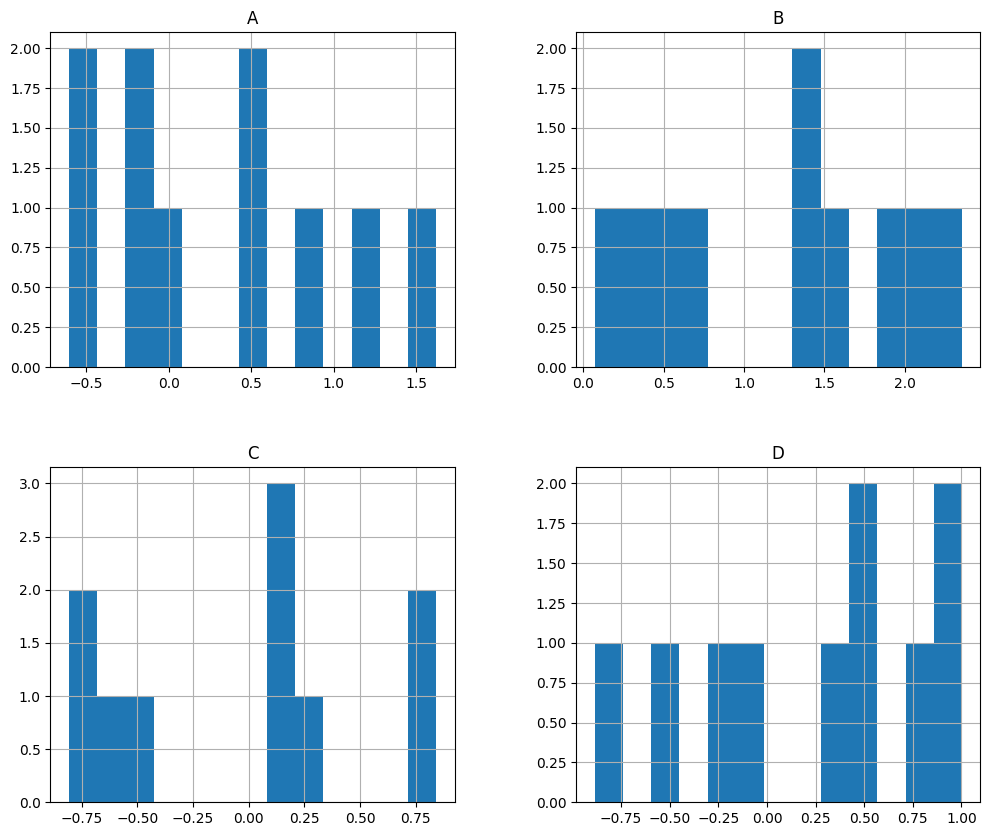

In [7]:
# Plot a histogram for each attribute/feature

df.hist(bins=13, figsize=(12,10))

# GeoPandas

For GeoPandas see the [GeoPandas webpage](https://geopandas.org/en/stable/)

Let's install some libraries for GeoPandas first



In [8]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install fiona shapely pyproj rtree
!pip install geopandas
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  javascript-common libjs-sphinxdoc libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  javascript-common libjs-sphinxdoc libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 7 newly installed, 0 to remove and 41 not upgraded.
Need to get 628 kB of archives.
After this operation, 2,385 kB of a

In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium

First download a shapefile of the dutch provinces (if you want other regions, e.g. communes, find a shapefile of those).

For example: https://public.opendatasoft.com/explore/assets/georef-netherlands-provincie-millesime/export/

Download: https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-netherlands-provincie-millesime/exports/shp/?lang=en&timezone=Europe%2FAmsterdam&use_labels=true

In [10]:
mapdf = gpd.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-netherlands-provincie-millesime/exports/shp/?lang=en&timezone=Europe%2FAmsterdam&use_labels=true")
mapdf

,Year,Provincie_c,Provincie_n,ISO_3166_3_,Type,Provincie_c,geometry
0,2021,['PV27'],['Noord-Holland'],NLD,Provincie,['PV27'],"POLYGON ((4.81838 53.21427, 4.83031 53.21065, ..."
1,2021,['PV29'],['Zeeland'],NLD,Provincie,['PV29'],"POLYGON ((3.77368 51.78152, 3.82621 51.76584, ..."
2,2021,['PV22'],['Drenthe'],NLD,Provincie,['PV22'],"POLYGON ((6.11982 52.85421, 6.12125 52.85474, ..."
3,2021,['PV26'],['Utrecht'],NLD,Provincie,['PV26'],"POLYGON ((5.40464 52.24963, 5.40324 52.24607, ..."
4,2021,['PV20'],['Groningen'],NLD,Provincie,['PV20'],"POLYGON ((6.31516 53.09405, 6.31274 53.09462, ..."
5,2021,['PV28'],['Zuid-Holland'],NLD,Provincie,['PV28'],"POLYGON ((5.02691 51.85861, 5.02544 51.85855, ..."
6,2021,['PV21'],['Fryslân'],NLD,Provincie,['PV21'],"POLYGON ((5.79518 52.80652, 5.78981 52.80369, ..."
7,2021,['PV25'],['Gelderland'],NLD,Provincie,['PV25'],"POLYGON ((5.00036 51.82093, 5.0009 51.82098, 5..."
8,2021,['PV24'],['Flevoland'],NLD,Provincie,['PV24'],"POLYGON ((5.86431 52.51817, 5.86325 52.51553, ..."
9,2021,['PV23'],['Overijssel'],NLD,Provincie,['PV23'],"POLYGON ((6.76057 52.11878, 6.75549 52.1187, 6..."


In [11]:
#Remove Water bodies IJsselmeer en Zeeuwse meren
map_nowater_df = mapdf[mapdf["Type"] == "Provincie"]
#Sort on Province name and reset index
map_nowater_df.sort_values("Provincie_n", inplace=True)
map_nowater_df = map_nowater_df.reset_index(drop=True)
map_nowater_df

,Year,Provincie_c,Provincie_n,ISO_3166_3_,Type,Provincie_c,geometry
0,2021,['PV22'],['Drenthe'],NLD,Provincie,['PV22'],"POLYGON ((6.11982 52.85421, 6.12125 52.85474, ..."
1,2021,['PV24'],['Flevoland'],NLD,Provincie,['PV24'],"POLYGON ((5.86431 52.51817, 5.86325 52.51553, ..."
2,2021,['PV21'],['Fryslân'],NLD,Provincie,['PV21'],"POLYGON ((5.79518 52.80652, 5.78981 52.80369, ..."
3,2021,['PV25'],['Gelderland'],NLD,Provincie,['PV25'],"POLYGON ((5.00036 51.82093, 5.0009 51.82098, 5..."
4,2021,['PV20'],['Groningen'],NLD,Provincie,['PV20'],"POLYGON ((6.31516 53.09405, 6.31274 53.09462, ..."
5,2021,['PV31'],['Limburg'],NLD,Provincie,['PV31'],"POLYGON ((5.86447 51.75768, 5.86571 51.75892, ..."
6,2021,['PV30'],['Noord-Brabant'],NLD,Provincie,['PV30'],"MULTIPOLYGON (((5.00036 51.82093, 5.0014 51.82..."
7,2021,['PV27'],['Noord-Holland'],NLD,Provincie,['PV27'],"POLYGON ((4.81838 53.21427, 4.83031 53.21065, ..."
8,2021,['PV23'],['Overijssel'],NLD,Provincie,['PV23'],"POLYGON ((6.76057 52.11878, 6.75549 52.1187, 6..."
9,2021,['PV26'],['Utrecht'],NLD,Provincie,['PV26'],"POLYGON ((5.40464 52.24963, 5.40324 52.24607, ..."


In [12]:
#Add relevant data to the dataframe
#Create dataframe with number of inhabitants per Province

prov_inhab_df = pd.DataFrame({'PROVINCE':['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Utrecht', 'Zeeland', 'Zuid-Holland'],
                               'INHABITANTS':[494760, 428264, 651459, 2096620, 586813, 1115895, 2573853, 2887906, 1166478, 1361093, 385379, 3726173]})
prov_inhab_df

,PROVINCE,INHABITANTS
0,Drenthe,494760
1,Flevoland,428264
2,Friesland,651459
3,Gelderland,2096620
4,Groningen,586813
5,Limburg,1115895
6,Noord-Brabant,2573853
7,Noord-Holland,2887906
8,Overijssel,1166478
9,Utrecht,1361093


In [13]:
# Combine prov_inhab_df with map_nowater_df
# Note: Province names have the same order

map_inhab_df = gpd.GeoDataFrame(pd.concat([prov_inhab_df, map_nowater_df], axis=1))
map_inhab_df

,PROVINCE,INHABITANTS,Year,Provincie_c,Provincie_n,ISO_3166_3_,Type,Provincie_c,geometry
0,Drenthe,494760,2021,['PV22'],['Drenthe'],NLD,Provincie,['PV22'],"POLYGON ((6.11982 52.85421, 6.12125 52.85474, ..."
1,Flevoland,428264,2021,['PV24'],['Flevoland'],NLD,Provincie,['PV24'],"POLYGON ((5.86431 52.51817, 5.86325 52.51553, ..."
2,Friesland,651459,2021,['PV21'],['Fryslân'],NLD,Provincie,['PV21'],"POLYGON ((5.79518 52.80652, 5.78981 52.80369, ..."
3,Gelderland,2096620,2021,['PV25'],['Gelderland'],NLD,Provincie,['PV25'],"POLYGON ((5.00036 51.82093, 5.0009 51.82098, 5..."
4,Groningen,586813,2021,['PV20'],['Groningen'],NLD,Provincie,['PV20'],"POLYGON ((6.31516 53.09405, 6.31274 53.09462, ..."
5,Limburg,1115895,2021,['PV31'],['Limburg'],NLD,Provincie,['PV31'],"POLYGON ((5.86447 51.75768, 5.86571 51.75892, ..."
6,Noord-Brabant,2573853,2021,['PV30'],['Noord-Brabant'],NLD,Provincie,['PV30'],"MULTIPOLYGON (((5.00036 51.82093, 5.0014 51.82..."
7,Noord-Holland,2887906,2021,['PV27'],['Noord-Holland'],NLD,Provincie,['PV27'],"POLYGON ((4.81838 53.21427, 4.83031 53.21065, ..."
8,Overijssel,1166478,2021,['PV23'],['Overijssel'],NLD,Provincie,['PV23'],"POLYGON ((6.76057 52.11878, 6.75549 52.1187, 6..."
9,Utrecht,1361093,2021,['PV26'],['Utrecht'],NLD,Provincie,['PV26'],"POLYGON ((5.40464 52.24963, 5.40324 52.24607, ..."


<Axes: >

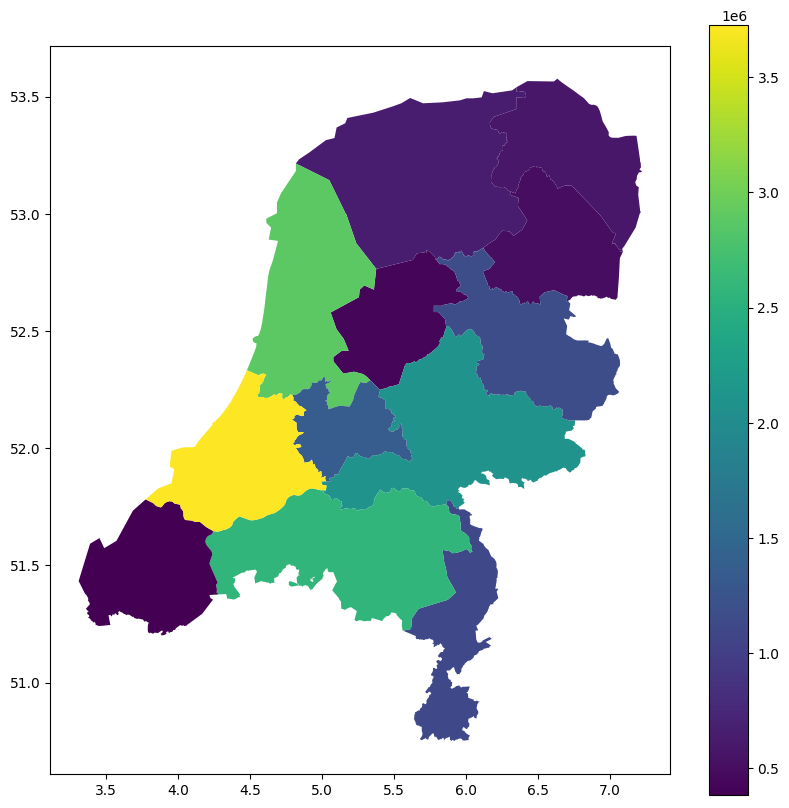

In [14]:
# Now you can plot a map with colors indicating relative number of inhabitants per province

map_inhab_df.plot(column='INHABITANTS', figsize=(10,10), legend=True)

# Plotly express interactive plots

In [15]:
# Install plotly express
!pip install plotly_express

In [16]:
import plotly_express as px

In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/drive/My Drive/Datasets/stocks.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [19]:
# Function to plot interactive plots using Plotly Express

def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [20]:
# plot interactive chart for stock price data

interactive_plot(stock_price_df, 'Stock Prices')